# Step 0 Cluster the Malware Bazaar data set

This is in the file (which has been checked in):
    malbaz/cen_389300.csv

On the 2021-09-17 the CSV file provided by Malware Bazaar had 389300 lines.
To download an updated version and cluster this data set, see malbaz/README.
Using HAC-T with a threshold distance CDist=30, the resulting clustering had 16453 clutsters.

The clusters are described in the file malbaz/cen_389300.csv, which has the following columns
    tlsh       TLSH of the center of the cluster
    family     The most common "signature" in the cluster
    firstSeen  The first seen date for the cluster (earliest of all first seen dates)
    label      The following concatenated: family, firstseen, nitems
    radius     The radius of the cluster
    nitems     The number of items in the cluster

Below we list the 20 most frequently occurring family assigned to clusters:

3416    AgentTesla \
2782    NULL \
942     Heodo \
725     AveMariaRAT \
721     Mirai \
708     FormBook \
580     Loki \
558     QuakBot \
416     RemcosRAT \
382     Dridex \
316     NanoCore \
311     IcedID \
304     SnakeKeylogger \
244     TrickBot \
242     GuLoader \
231     Gozi \
214     RedLineStealer \
210     CobaltStrike \
197     MassLogger \
184     njrat


# Step 1 Display a dendogram for all clusters assigned to a malware family
For our first demonstration,
we selected FickerStealer because the dendrogram was not too large / too dense.
Note: We provide some tools for narrowing the search / showing more meaningful dendrograms.

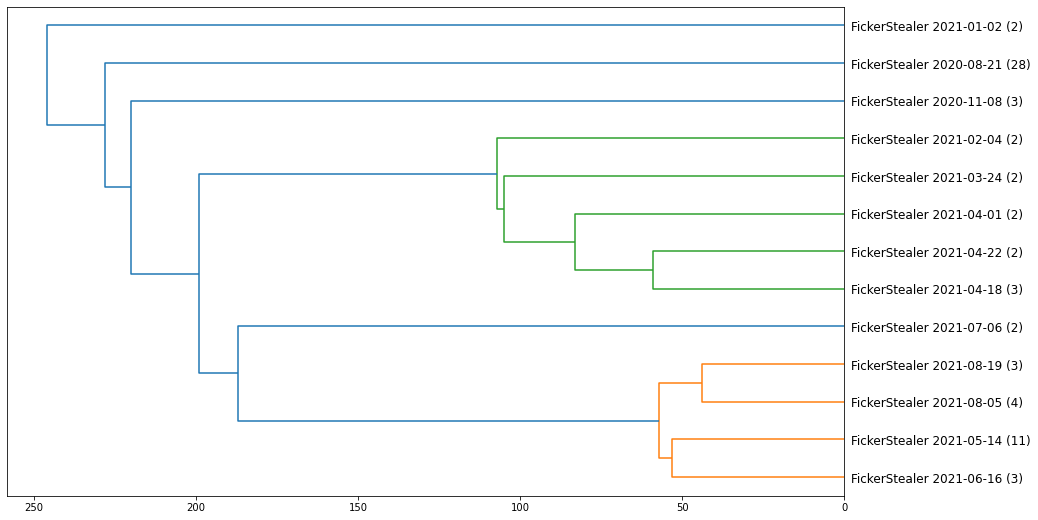

In [1]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv", searchColName="family", searchValueList=['FickerStealer'])
tlsh_dendrogram(tlist, labelList=labels[0])

## Interpretation of FickerStealer dendrogram

We see a set of close clusters (distances between clusters < 110) in the months of March and April.
We see a set of even closer clusters (distances between clusters < 60) in the months of May and August.
There may have been a significant change in the malware family between April and May 2021.

# Step 2 Show a dendrogram for the RacoonStealer family
# Use the date filtering options (sDate and eDate)

We start by generating a dendrogram for the entire RacoonStealer malware family.

It is recommended that you filter to a smaller list of TLSH values.



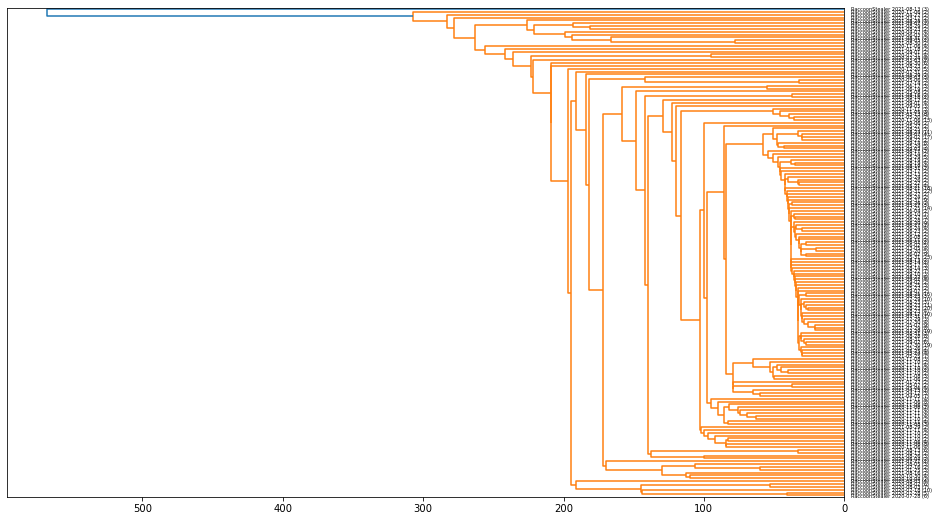

In [2]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv", searchColName="family", searchValueList=['RaccoonStealer'])
tlsh_dendrogram(tlist, labelList=labels[0])

## 2.1 Use the sDate parameter to specify clusters after a date

The above dendrogram was not useful.
So we set the start date (sDate) paremeter to "2021-09-01", so that we only show clusters with a firstSeen date
which occurs on or after 2021-09-01

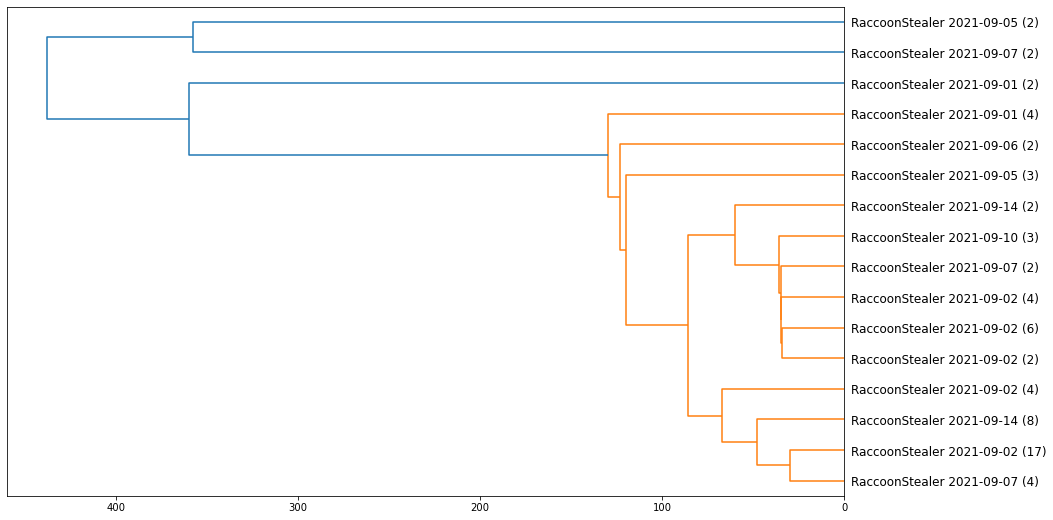

In [3]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv", searchColName="family", searchValueList=['RaccoonStealer'],
                              sDate="2021-09-01")
tlsh_dendrogram(tlist, labelList=labels[0])

## 2.2 Use the sDate and eDate parameters to specify clusters in a date range

Here we select clusters in the first quarter of 2021.
That is in the range: 2021-01-01 to 2021-03-31

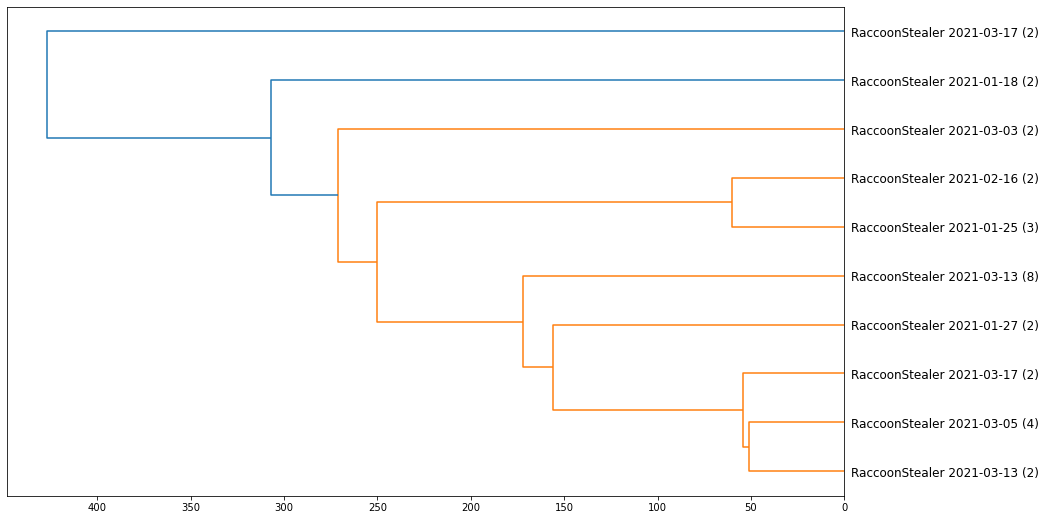

In [4]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv", searchColName="family", searchValueList=['RaccoonStealer'],
                              sDate="2021-01-01", eDate="2021-03-31")
tlsh_dendrogram(tlist, labelList=labels[0])

# Step 3 Show all the clusters surrounding a new file using simTlsh

We got a file which had TLSH value
T14893F844FD459B2FC3D372F6E75C028D763A1FE8A7E630269934BEA023F56D12526911

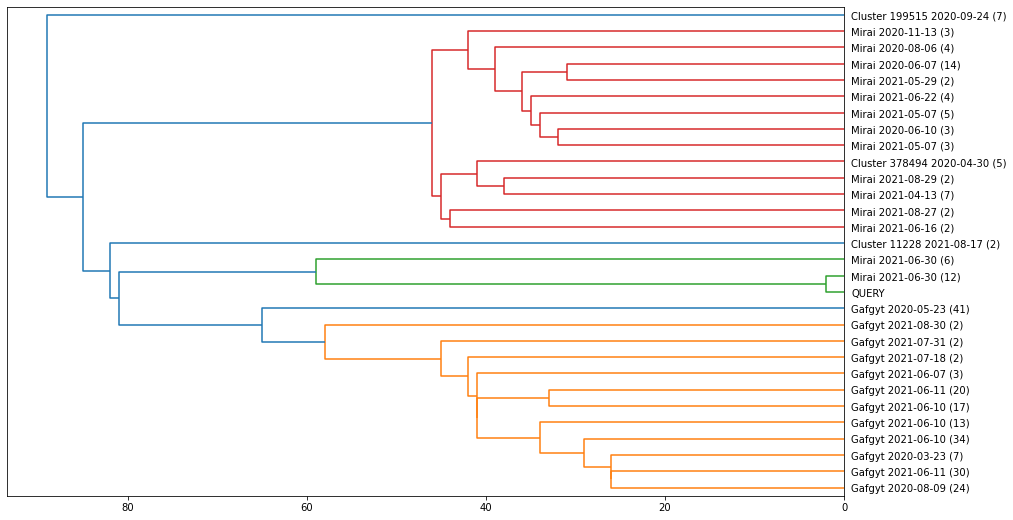

In [5]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv",
        simTlsh="T14893F844FD459B2FC3D372F6E75C028D763A1FE8A7E630269934BEA023F56D12526911",
        simThreshold=130)
tlsh_dendrogram(tlist, labelList=labels[0])

## Interpretation of Mirai / Gafgyt dendrogram

The sample provided is called "QUERY" and it is in the 7th row of the dendrogram (near the top).
We see that it is close to a Mirai cluster.
We can adjust the simThreshold to only display clusters closer to our simTlsh (see below).

We see that there is a large branch of Gafgyt malware clusters at the top of the diagram.
And a large branch of Mirai malware clusters at the bottom of the diagram.
This makes perfect sense.
It was reported in April 2021, that Gafgyt had started re-using Mirai code.

https://securityaffairs.co/wordpress/116882/cyber-crime/gafgyt-re-uses-mirai-code.html

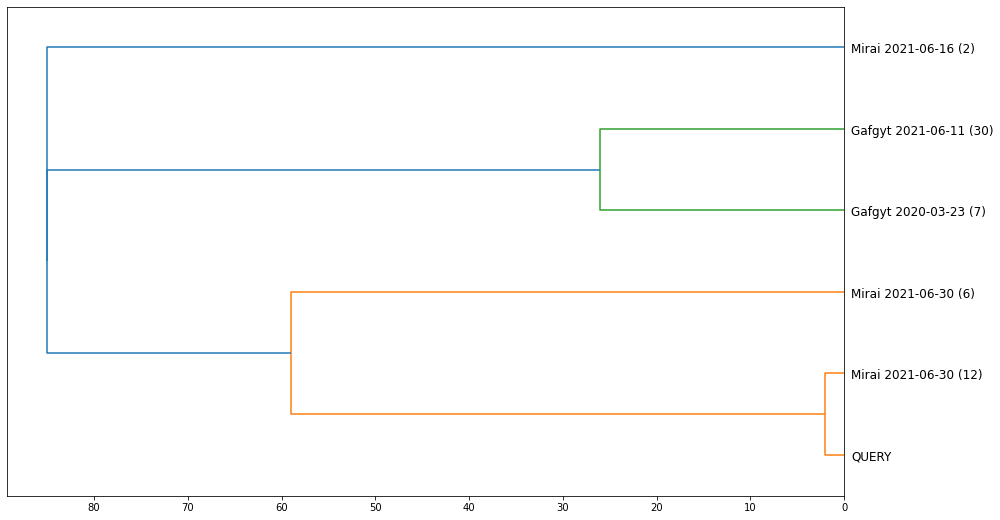

In [6]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv",
        simTlsh="T14893F844FD459B2FC3D372F6E75C028D763A1FE8A7E630269934BEA023F56D12526911",
        simThreshold=100)
tlsh_dendrogram(tlist, labelList=labels[0])

Here we reduced the simThreshold to 80.
We find that our simTlsh has a distance < 10 to the Mirai 2021006-30 cluster
Our sample is highly likely to be a sample of Mirai malware.

# Step 4 Show all the clusters surrounding a specified cluster

We had a SnakeKeyLogger cluster which was first seen on 2021-09-16
This cluster has center
T12584BF243AFB8019F173AFBA8FE575969B6EFA633603D55D2491038A0613B81CDC153E
(this is line 42 of malbaz/cen_389300.csv)

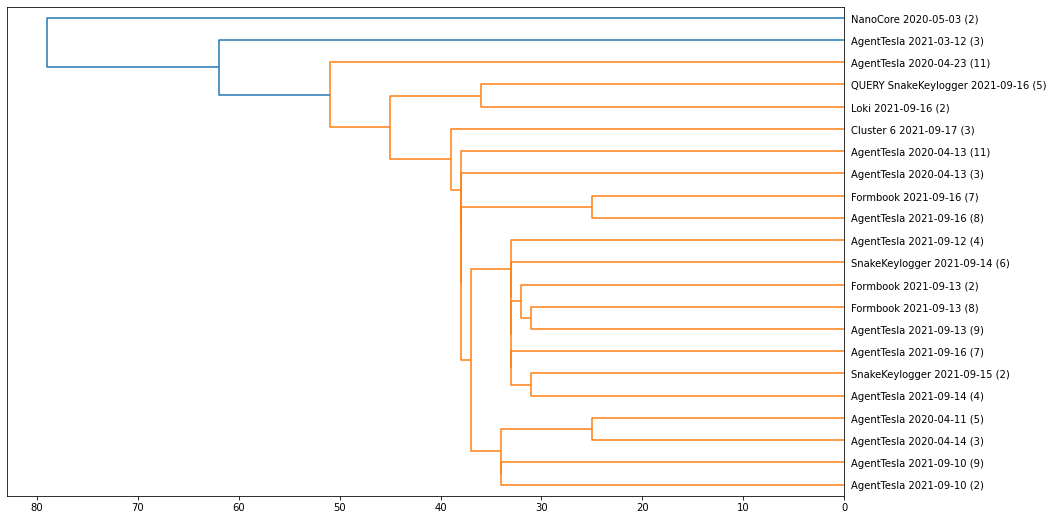

In [7]:
from pylib.tlsh_lib import *
(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv",
        simTlsh="T12584BF243AFB8019F173AFBA8FE575969B6EFA633603D55D2491038A0613B81CDC153E",
        simThreshold=90)
tlsh_dendrogram(tlist, labelList=labels[0])

## Interpretation of SnakeKeylogger / AgentTesla / Formbook / Loki dendrogram

We see that the SnakeKeyLogger cluster is mixed in a group of AgentTesla / Loki and Formbook clusters.
These malware families are known to exhibit similar properties.
They are information stealer / RATs which are typically sent attached to spam emails. 

    "Researchers say the attackers’ use of several common malware families makes attribution of this 
    campaign to a particular threat group difficult."
https://cyberintelmag.com/malware-viruses/year-long-spear-phishing-campaign-targets-energy-sector-with-agent-tesla-other-rats/

https://asec.ahnlab.com/en/22074/


# Step 5 Work with unlabelled clusters

We generate a dendrogram which includes unlabeled clusters.
We extract information about those clusters and show how to list the members.

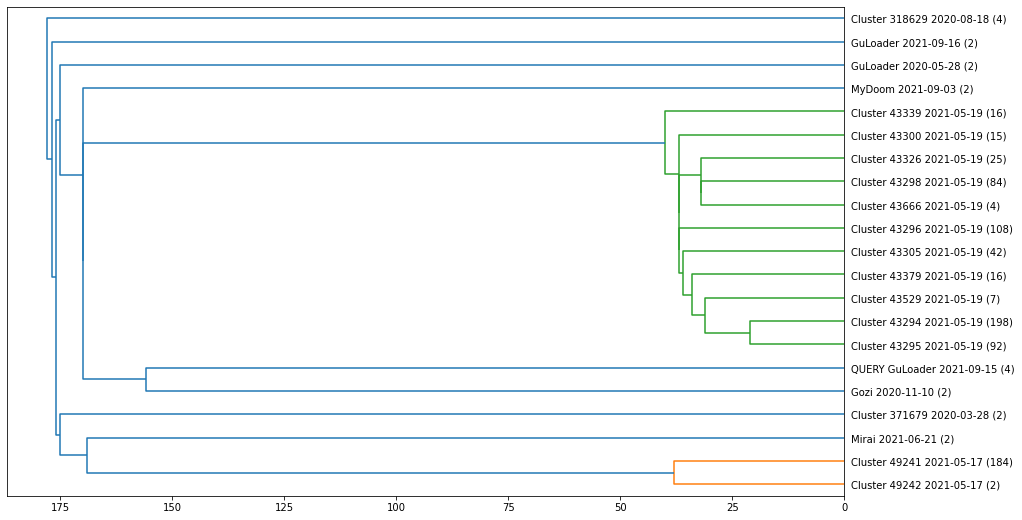

In [8]:
from pylib.tlsh_lib import *

(tlist, labels) = tlsh_csvfile("malbaz/clust_389300.csv",
        simTlsh="T10923013EC661113BCD05DB76E2622B7E24A64C768F6B70D871E7208A3CFE8505F42961",
        simThreshold=180)
tlsh_dendrogram(tlist, labelList=labels[0])

In the middle of this dendrogram (the green section) we see a group of clusters without labels.
We now extract information about Cluster 43300

In [9]:
from pylib.tlsh_lib import *
mb_show_sha1("Cluster 43300")

cluster with cenTlsh=8223F1DD9867B028C6141BB4A2F1759A2D8BAE14EB05409F2CF91B1D330B670F91B7F9
showing first  10  samples
	increase the showN parameter to show more...
4df99c597d4fe38e6925652305a4942f367557b8
3dd48fd77a14221bd86826b265c09309bcf87b15
8e0ea7a7bbcff6ea8afbb97114ef78db33a1c001
4268a0d3e90d95381ed07cbbe50a657f8efdf40d
b325aa940337112e077106907791b1086ca4cc79
c0ddbf7934d778c921b5c4b76851d3623fc2a229
728240769d27beee8f1d95a8f68f62af57023e43
8e5af4cb33dad1d7b85d131aed48069fa5087955
7a6955713284e4a0d62f2c1464ae0683261b300b
bc3839eeffa1ec9465d108d82571aabd4f540ace


We also show how to get more information about Gozi 2020-11-10 (2) which is the 5th row from the bottom.

In [10]:
from pylib.tlsh_lib import *
mb_show_sha1("MyDoom", thisDate="2021-09-03")

cluster with cenTlsh=T12D13F1567E49D486C008823D9463FDE03876BD39AD7E90977F51B33FA97AA587900037
fc2073bfd6d7c8be5b30f0196110056b3ed2b109
36a61581ee833366a2f75c900cba601a3b317105
